In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [19]:
start = '2010-01-01'
end='2022-10-22'
df=data.DataReader('AAPL','yahoo',start,end)
df.head()

High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2009-12-31  7.619643  7.520000  7.611786  7.526071  352410800.0   6.426001
2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0   6.526020
2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0   6.537305
2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0   6.433321
2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0   6.421424

In [20]:
df.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2022-10-17  142.899994  140.270004  141.070007  142.410004  85250900.0   
2022-10-18  146.699997  140.610001  145.490005  143.750000  99136600.0   
2022-10-19  144.949997  141.500000  141.690002  143.860001  61758300.0   
2022-10-20  145.889999  142.649994  143.020004  143.389999  64522000.0   
2022-10-21  147.850006  142.649994  142.869995  147.270004  86464700.0   

             Adj Close  
Date                    
2022-10-17  142.410004  
2022-10-18  143.750000  
2022-10-19  143.860001  
2022-10-20  143.389999  
2022-10-21  147.270004

#EDA

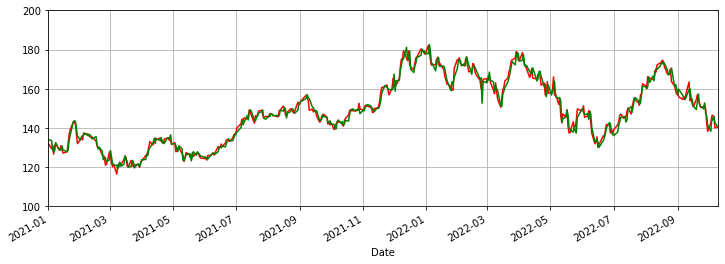

In [92]:
#timly graph for any stock.
df['Close'].plot(xlim=['2021-01-01','2022-10-10'],ylim=[100,200],figsize=(12,4),c='red')
df['Open'].plot(xlim=['2021-01-01','2022-10-10'],ylim=[100,200],figsize=(12,4),c='green')
# plt.plot(df.Close)
plt.grid()

In [41]:
index = df.loc['2020-01-01':'2022-10-28'].index
share_open=df.loc['2020-01-01':'2022-10-28']['Open']
share_close=df.loc['2020-01-01':'2022-10-28']['Close']

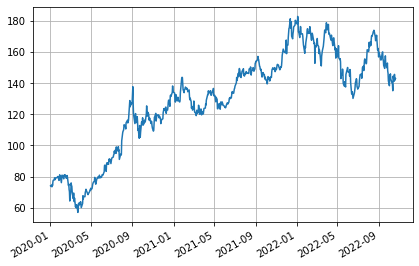

In [93]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)
plt.grid()

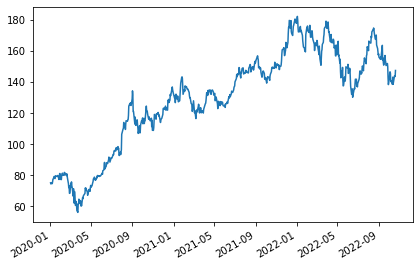

In [43]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_close)

In [45]:
###date- time
from datetime import datetime

In [48]:
date = datetime(2021,11,21)

In [49]:
date

datetime.datetime(2021, 11, 21, 0, 0)

In [50]:
date.date()

datetime.date(2021, 11, 21)

In [51]:
date.day

21

In [52]:
date.weekday()

6

In [53]:
# time Resampling

In [65]:
# rule A means yearly data.
miniz = df.resample(rule='A').min()
print(miniz)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2009-12-31    7.619643    7.520000    7.611786    7.526071  352410800.0   
2010-12-31    7.000000    6.794643    6.870357    6.858929  157494400.0   
2011-12-31   11.346429   11.089286   11.310000   11.261429  179662000.0   
2012-12-31   14.732143   14.607143   14.621429   14.686786  175753200.0   
2013-12-31   14.271429   13.753571   13.856071   13.947500  167554800.0   
2014-12-31   17.911785   17.626785   17.684999   17.849285   57918400.0   
2015-12-31   26.757500   23.000000   23.717501   25.780001   52185600.0   
2016-12-31   22.917500   22.367500   22.500000   22.584999   45903600.0   
2017-12-31   29.082500   28.690001   28.950001   29.004999   56106800.0   
2018-12-31   37.887501   36.647499   37.037498   36.707500   50055600.0   
2019-12-31   36.430000   35.500000   35.994999   35.547501   45448000.0   
2020-12-31   57.125000   

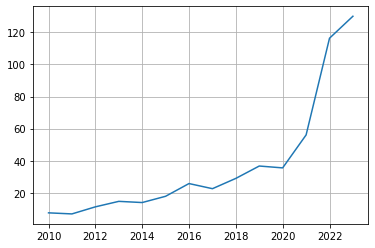

In [94]:
plt.plot(miniz.Close)
plt.grid()

In [148]:
maxiz = df.resample(rule='A').max()
print(maxiz)

                  High         Low        Open       Close        Volume  \
Date                                                                       
2009-12-31    7.619643    7.520000    7.611786    7.526071  3.524108e+08   
2010-12-31   11.666429   11.610714   11.650714   11.623929  1.867110e+09   
2011-12-31   15.239286   14.856786   15.062857   15.080000  1.880998e+09   
2012-12-31   25.181070   24.984644   25.086071   25.075001  1.506120e+09   
2013-12-31   20.540714   20.228930   20.451786   20.360357  1.460852e+09   
2014-12-31   29.937500   29.512501   29.817499   29.750000  1.065523e+09   
2015-12-31   33.634998   32.849998   33.615002   33.250000  6.488252e+08   
2016-12-31   29.672501   29.362499   29.545000   29.562500  5.334788e+08   
2017-12-31   44.299999   43.715000   43.777500   44.105000  4.479400e+08   
2018-12-31   58.367500   57.445000   57.695000   58.017502  3.849868e+08   
2019-12-31   73.492500   72.379997   72.779999   73.412498  3.652488e+08   
2020-12-31  

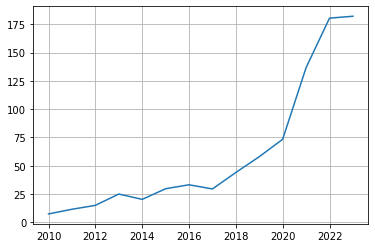

In [150]:
plt.plot(maxiz.Close)
plt.grid()

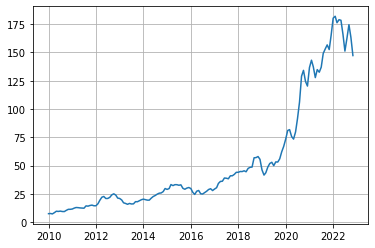

In [152]:
montly_maxiz = df.resample(rule='M').max()
plt.plot(montly_maxiz.Close)
plt.grid()

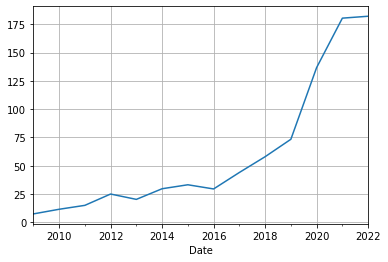

In [96]:
#business end
df.resample(rule='BA').max()['Close'].plot()
plt.grid()

<AxesSubplot:xlabel='Date'>

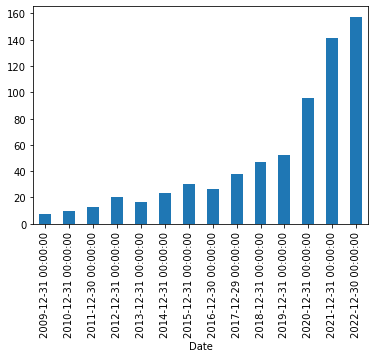

In [99]:
#business end
df.resample(rule='BA')['Close'].mean().plot(kind='bar')

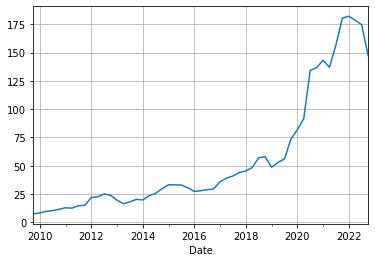

In [100]:
#business end
df.resample(rule='BQS').max()['Close'].plot()
plt.grid()

<AxesSubplot:xlabel='Date'>

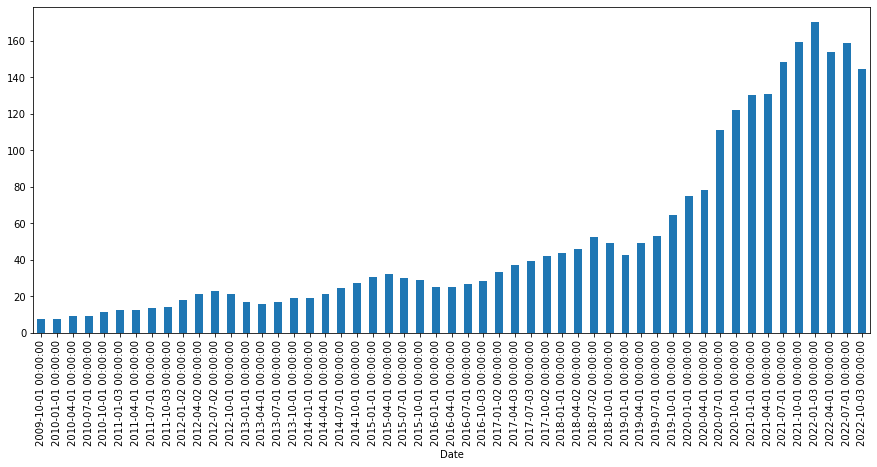

In [82]:
#business quaters
df.resample(rule='BQS')['High'].mean().plot(kind='bar',figsize=(15,6))

<AxesSubplot:>

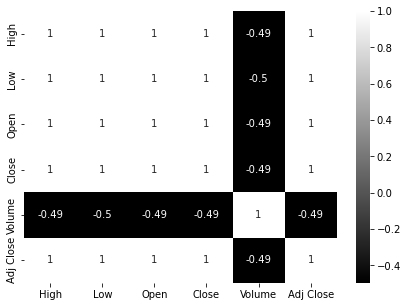

In [126]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='gray',annot=True)

In [ ]:
# From the above heatmap, you can see a large number of 1s and values 
# close to 1. This means those variables show high positive 
# correlations and are interrelated. This might be possible because 
# of the comparatively very small difference between those values. 
# However,in-stock market this small value is what makes the difference

In [ ]:
# # The open-high shows the most negative correlation with the 
# volume feature. This means that the greater the difference between 
# the opening value of the stock and the highest value of stock that 
# day, the greater will be the stocks traded that day. As there is 
# no information about the number of buyers and sellers, we can only 
# guess that a high difference in opening and highest value of the 
# stock might attract more buyers. Whereas a fewer difference may 
# attract more sellers.

# # From the below graph, you can observe that the volume is high 
# for smaller values of open-high as compared to larger values of
# open-high.



<AxesSubplot:xlabel='Open', ylabel='Volume'>

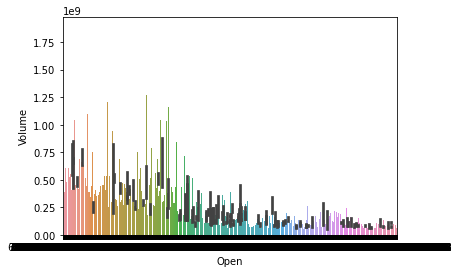

In [88]:
sns.barplot(data=df, x = "Open", y="Volume")

In [90]:
mean = df['Close'].mean()
std = df['Close'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = 49.94335049902746
Std deviation = 46.34835038627674


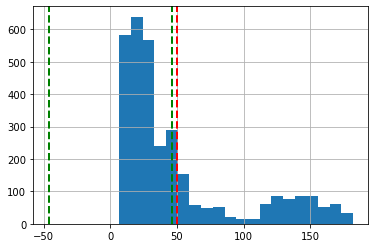

In [103]:
df['Close'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

In [114]:
#Comparing some big FAANG commany's stock.

In [135]:
df1=data.DataReader('META','yahoo',start,end)
df2=data.DataReader('AMZN','yahoo',start,end)
df3=data.DataReader('AAPL','yahoo',start,end)
df4=data.DataReader('NFLX','yahoo',start,end)
df5=data.DataReader('GOOGL','yahoo',start,end)

In [136]:
close_price=pd.DataFrame()

In [137]:
close_price['facebook']=df1.Close
close_price['amazon']=df2.Close
close_price['apple']=df3.Close
close_price['netflix']=df4.Close
close_price['google']=df5.Close

In [138]:
close_price.head()

facebook   amazon      apple    netflix     google
Date                                                           
2012-05-18  38.230000  10.6925  18.942142   9.994286  15.025025
2012-05-21  34.029999  10.9055  20.045713  10.248571  15.368118
2012-05-22  31.000000  10.7665  19.891787   9.672857  15.035035
2012-05-23  32.000000  10.8640  20.377144  10.272857  15.251752
2012-05-24  33.029999  10.7620  20.190001  10.038571  15.106607

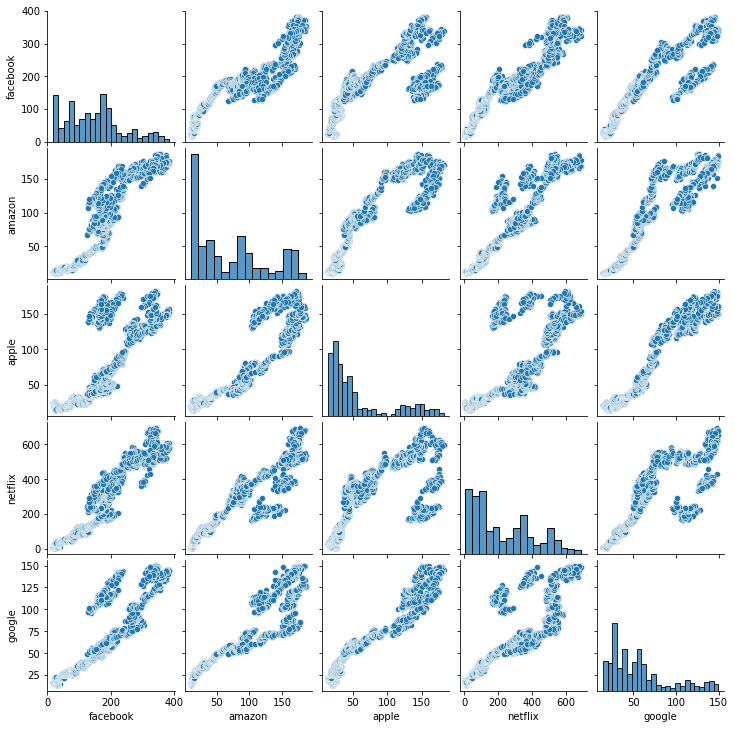

In [147]:
z=sns.pairplot(data=close_price,height=3.5)
z.fig.set_size_inches(10,10)

<AxesSubplot:>

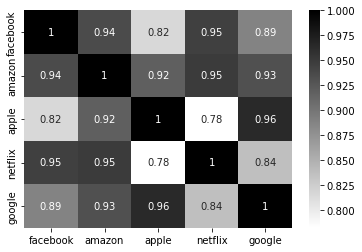

In [124]:
sns.heatmap(close_price.corr(),annot=True,cmap='gray_r',linecolor="black")

In [127]:
# result - Closing price of apple and google have a co-relation of 0.96.

In [4]:
df=df.reset_index()
df.head()

Date      High       Low      Open     Close       Volume  Adj Close
0 2009-12-31  7.619643  7.520000  7.611786  7.526071  352410800.0   6.425999
1 2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0   6.526021
2 2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0   6.537303
3 2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0   6.433319
4 2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0   6.421425

In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

High       Low      Open     Close       Volume
0  7.619643  7.520000  7.611786  7.526071  352410800.0
1  7.660714  7.585000  7.622500  7.643214  493729600.0
2  7.699643  7.616071  7.664286  7.656429  601904800.0
3  7.686786  7.526786  7.656429  7.534643  552160000.0
4  7.571429  7.466071  7.562500  7.520714  477131200.0

In [9]:
df.tail()

High         Low        Open       Close      Volume
3220  142.899994  140.270004  141.070007  142.410004  85250900.0
3221  146.699997  140.610001  145.490005  143.750000  99136600.0
3222  144.949997  141.500000  141.690002  143.860001  61758300.0
3223  145.889999  142.649994  143.020004  143.389999  64522000.0
3224  147.850006  142.649994  142.869995  147.270004  86464700.0

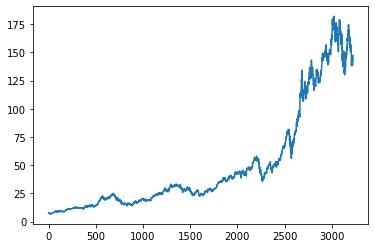

In [6]:
plt.plot(df.Close)

In [145]:
df

High         Low        Open       Close       Volume
0       7.619643    7.520000    7.611786    7.526071  352410800.0
1       7.660714    7.585000    7.622500    7.643214  493729600.0
2       7.699643    7.616071    7.664286    7.656429  601904800.0
3       7.686786    7.526786    7.656429    7.534643  552160000.0
4       7.571429    7.466071    7.562500    7.520714  477131200.0
...          ...         ...         ...         ...          ...
3220  142.899994  140.270004  141.070007  142.410004   85250900.0
3221  146.699997  140.610001  145.490005  143.750000   99136600.0
3222  144.949997  141.500000  141.690002  143.860001   61758300.0
3223  145.889999  142.649994  143.020004  143.389999   64522000.0
3224  147.850006  142.649994  142.869995  147.270004   86464700.0

[3225 rows x 5 columns]

In [146]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3220    151.2537
3221    151.2860
3222    151.2868
3223    151.2243
3224    151.2086
Name: Close, Length: 3225, dtype: float64

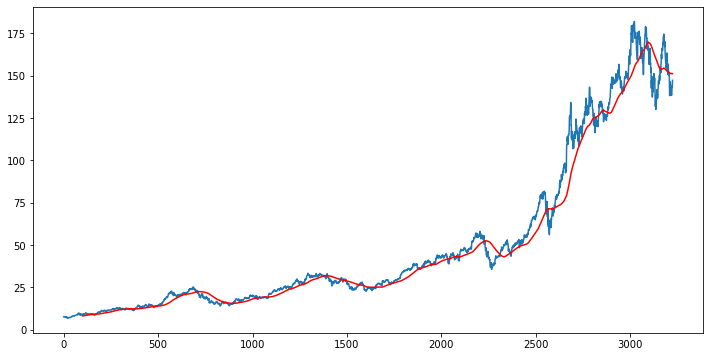

In [147]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [148]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3220    157.99880
3221    157.82970
3222    157.63895
3223    157.45740
3224    157.31915
Name: Close, Length: 3225, dtype: float64

NameError: name 'ma100' is not defined

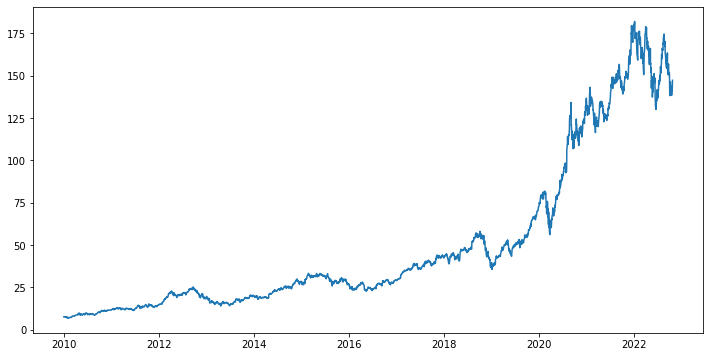

In [104]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.grid()

In [150]:
print(df)

            High         Low        Open       Close       Volume
0       7.619643    7.520000    7.611786    7.526071  352410800.0
1       7.660714    7.585000    7.622500    7.643214  493729600.0
2       7.699643    7.616071    7.664286    7.656429  601904800.0
3       7.686786    7.526786    7.656429    7.534643  552160000.0
4       7.571429    7.466071    7.562500    7.520714  477131200.0
...          ...         ...         ...         ...          ...
3220  142.899994  140.270004  141.070007  142.410004   85250900.0
3221  146.699997  140.610001  145.490005  143.750000   99136600.0
3222  144.949997  141.500000  141.690002  143.860001   61758300.0
3223  145.889999  142.649994  143.020004  143.389999   64522000.0
3224  147.850006  142.649994  142.869995  147.270004   86464700.0

[3225 rows x 5 columns]


In [151]:
req_col=pd.DataFrame(df['Close'])
col=np.array(req_col)
len(req_col)

3225

In [171]:
#spliting Data into Training and Testing
train_size = int(len(req_col)*0.7)
test_size = (len(col)-train_size)
train_data,test_data = col[0:train_size,:],col[train_size:len(col),:1]
print(train_data.shape)                                                           # no. of rows in my training data. 
print(test_data.shape)                                                           # no. of rows in my test data. 

(2257, 1)
(968, 1)


In [172]:
print(train_data)

[[ 7.52607107]
 [ 7.64321423]
 [ 7.65642881]
 ...
 [41.36999893]
 [40.98500061]
 [41.51750183]]


In [173]:
print(test_data[100])

[47.72999954]


In [174]:
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(train_data)
print(data_training_array)

[[0.01304067]
 [0.01533047]
 [0.01558878]
 ...
 [0.67459016]
 [0.66706457]
 [0.67747341]]


In [175]:
data_training_array.shape

(2257, 1)

In [163]:
x_train=[]
y_train=[]

for i in range(100,train_size):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

# print(x_train)                     don't use this exceding the dta limit of notebook.   
x_train

[array([[1.30406671e-02],
        [1.53304721e-02],
        [1.55887785e-02],
        [1.32082265e-02],
        [1.29359483e-02],
        [1.39133053e-02],
        [1.26078572e-02],
        [1.09393560e-02],
        [1.29848170e-02],
        [1.21331319e-02],
        [9.68974866e-03],
        [1.60495227e-02],
        [1.37387926e-02],
        [1.11836906e-02],
        [3.97921271e-03],
        [7.69315638e-03],
        [9.69672991e-03],
        [1.10510654e-02],
        [5.05429799e-03],
        [6.97193404e-06],
        [1.87092036e-03],
        [2.65978352e-03],
        [5.01241046e-03],
        [0.00000000e+00],
        [2.38053332e-03],
        [1.44507314e-03],
        [2.89016492e-03],
        [2.14317998e-03],
        [4.62146951e-03],
        [5.81524544e-03],
        [7.92353779e-03],
        [7.33014978e-03],
        [7.59541882e-03],
        [6.71579935e-03],
        [5.84316114e-03],
        [3.49751545e-03],
        [6.01072058e-03],
        [6.94618076e-03],
        [8.7

In [165]:
x_train=np.array(x_train)
y_train= np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(2157, 100, 1)
(2157,)


In [158]:
#ML Model

In [159]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential

In [160]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(60,return_sequences=True))
model.add(LSTM(80,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120))
model.add(Dense(1))

In [161]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_10 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 60)           26640     
                                                                 
 lstm_18 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_11 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_19 (LSTM)              (None, 120)               96480     
                                                                 
 dense_4 (Dense)             (None, 1)                

In [162]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
68/68 [==============================] - 44s 412ms/step - loss: 0.0140
Epoch 2/100
68/68 [==============================] - 30s 437ms/step - loss: 0.0013
Epoch 3/100
68/68 [==============================] - 27s 389ms/step - loss: 0.0014
Epoch 4/100
68/68 [==============================] - 20s 290ms/step - loss: 0.0012
Epoch 5/100
68/68 [==============================] - 25s 371ms/step - loss: 0.0012
Epoch 6/100
68/68 [==============================] - 25s 367ms/step - loss: 0.0012
Epoch 7/100
68/68 [==============================] - 25s 368ms/step - loss: 0.0012
Epoch 8/100
68/68 [==============================] - 25s 373ms/step - loss: 0.0011
Epoch 9/100
68/68 [==============================] - 24s 357ms/step - loss: 0.0011
Epoch 10/100
68/68 [==============================] - 27s 401ms/step - loss: 9.8354e-04
Epoch 11/100
68/68 [==============================] - 29s 420ms/step - loss: 0.0010
Epoch 12/100
68/68 [==============================] - 30s 442ms/step - loss: 8.36

In [166]:
model.save('keras_model.h5')

In [176]:
data_testing.head()

Close
2251  42.157501
2252  42.275002
2253  42.737499
2254  41.369999
2255  40.985001

In [179]:
train_data[-100:]

array([[47.74499893],
       [47.47750092],
       [47.57249832],
       [50.375     ],
       [51.84749985],
       [51.99750137],
       [52.26750183],
       [51.77750015],
       [51.8125    ],
       [52.22000122],
       [51.88249969],
       [52.21749878],
       [52.4375    ],
       [52.56000137],
       [53.33000183],
       [54.39500046],
       [53.86500168],
       [53.75999832],
       [53.76250076],
       [53.87250137],
       [54.04000092],
       [54.48500061],
       [54.92499924],
       [55.74499893],
       [56.25749969],
       [56.90750122],
       [57.09000015],
       [56.71749878],
       [55.77500153],
       [55.32500076],
       [54.58250046],
       [55.96250153],
       [55.26750183],
       [56.60250092],
       [55.95999908],
       [54.47000122],
       [54.56000137],
       [54.59249878],
       [55.00749969],
       [54.41500092],
       [55.19749832],
       [55.54750061],
       [55.10499954],
       [56.23749924],
       [56.43500137],
       [56

In [182]:
past_100_days = train_data[-100:]

In [190]:
import numpy
# final_df=train_data.append(past_100_days, ignore_index=True)
final_df=numpy.concatenate((past_100_days,test_data))

In [230]:
final_df[100:]

array([[ 40.22249985],
       [ 39.20750046],
       [ 37.68249893],
       [ 36.70750046],
       [ 39.29249954],
       [ 39.03749847],
       [ 39.05749893],
       [ 39.43500137],
       [ 39.47999954],
       [ 35.54750061],
       [ 37.06499863],
       [ 36.98249817],
       [ 37.6875    ],
       [ 38.32749939],
       [ 38.45000076],
       [ 38.07249832],
       [ 37.5       ],
       [ 38.26750183],
       [ 38.73500061],
       [ 38.96500015],
       [ 39.20500183],
       [ 38.32500076],
       [ 38.47999954],
       [ 38.17499924],
       [ 39.43999863],
       [ 39.07500076],
       [ 38.66999817],
       [ 41.3125    ],
       [ 41.61000061],
       [ 41.63000107],
       [ 42.8125    ],
       [ 43.54499817],
       [ 43.56000137],
       [ 42.73500061],
       [ 42.60250092],
       [ 42.35749817],
       [ 42.72249985],
       [ 42.54499817],
       [ 42.70000076],
       [ 42.60499954],
       [ 42.73249817],
       [ 43.00749969],
       [ 42.76499939],
       [ 43

In [231]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0832807 ],
       [0.0814543 ],
       [0.08210292],
       ...,
       [0.7395238 ],
       [0.73631478],
       [0.76280624]])

In [296]:
input_data.shape

(1068, 1)

In [302]:
input_test=[]
output_test=[]

for i in range(100,len(input_data)):
    input_test.append(input_data[i-100:i])
    output_test.append(input_data[i,0])

In [303]:
input_test, output_test = np.array(input_test), np.array(y_test)
print(input_test.shape)
print(output_test.shape)

(968, 100, 1)
(968,)


In [304]:
#making Prediction

output_predicted=model.predict(input_test)

31/31 [==============================] - 6s 204ms/step


In [305]:
print(output_predicted.shape)
print(y_test)

(968, 1)
[0.03191943 0.02498933 0.0145771  0.00792012 0.02556968 0.02382861
 0.02396517 0.02654264 0.02684987 0.         0.010361   0.00979771
 0.01461125 0.01898096 0.01981736 0.01723989 0.01333105 0.01857132
 0.02176325 0.02333362 0.02497227 0.0189639  0.02002218 0.01793974
 0.02657676 0.02408467 0.02131943 0.03936161 0.04139285 0.04152941
 0.04960314 0.05460441 0.05470684 0.049074   0.04816933 0.04649653
 0.04898865 0.04777672 0.04883503 0.04818639 0.04905691 0.05093454
 0.04927882 0.05253905 0.05468976 0.05486046 0.05578219 0.05284628
 0.05595289 0.05745499 0.05690876 0.05518478 0.05173679 0.05243663
 0.06266108 0.06609201 0.06745755 0.07090551 0.07498506 0.07822822
 0.0756849  0.07846719 0.09029614 0.08340019 0.07945721 0.07612869
 0.07899633 0.07942306 0.08152257 0.08372451 0.08846975 0.09073996
 0.09132031 0.09355637 0.09884784 0.09782367 0.09973542 0.09688486
 0.09674831 0.0973628  0.09739694 0.10401981 0.10526585 0.10640949
 0.1114449  0.1108987  0.10768968 0.1060169  0.106546

In [307]:
print(output_predicted)

[[0.06016623]
 [0.05814732]
 [0.05531662]
 [0.05127584]
 [0.04632402]
 [0.0432164 ]
 [0.04190934]
 [0.04160924]
 [0.04189721]
 [0.0423549 ]
 [0.04011475]
 [0.03698687]
 [0.03414378]
 [0.0324401 ]
 [0.03210694]
 [0.03262169]
 [0.0331093 ]
 [0.03291573]
 [0.03271815]
 [0.03298628]
 [0.03368233]
 [0.03463528]
 [0.03496934]
 [0.03482246]
 [0.03427794]
 [0.03442989]
 [0.03494203]
 [0.03521013]
 [0.03723818]
 [0.04063166]
 [0.04407852]
 [0.04789882]
 [0.05214835]
 [0.05589652]
 [0.05791667]
 [0.05841884]
 [0.05797205]
 [0.05746847]
 [0.05710707]
 [0.0570361 ]
 [0.05713489]
 [0.0573989 ]
 [0.05792815]
 [0.0584122 ]
 [0.05907159]
 [0.06002232]
 [0.06105008]
 [0.06203307]
 [0.06255192]
 [0.06298234]
 [0.06356142]
 [0.06414355]
 [0.06445286]
 [0.06419602]
 [0.0636929 ]
 [0.06423774]
 [0.06597198]
 [0.0682804 ]
 [0.07091014]
 [0.07386912]
 [0.07703717]
 [0.07941138]
 [0.08114837]
 [0.08411097]
 [0.08660294]
 [0.087727  ]
 [0.08752403]
 [0.08700018]
 [0.08668256]
 [0.08687167]
 [0.0876323 ]
 [0.08

In [204]:
scaler.scale_

array([0.00682769])

In [311]:
output_predicted=output_predicted*1/0.00682769
output_test=output_test*1/0.00682769

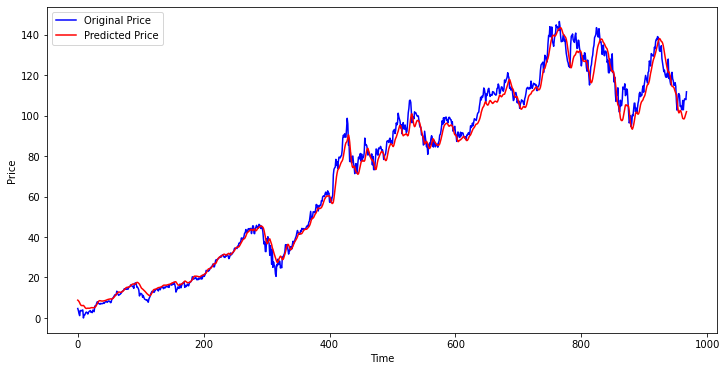

In [313]:
plt.figure(figsize=(12,6))
plt.plot(output_test,'b',label='Original Price')
plt.plot(output_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [310]:
# output in 50 epochs training above one seems overfitting.

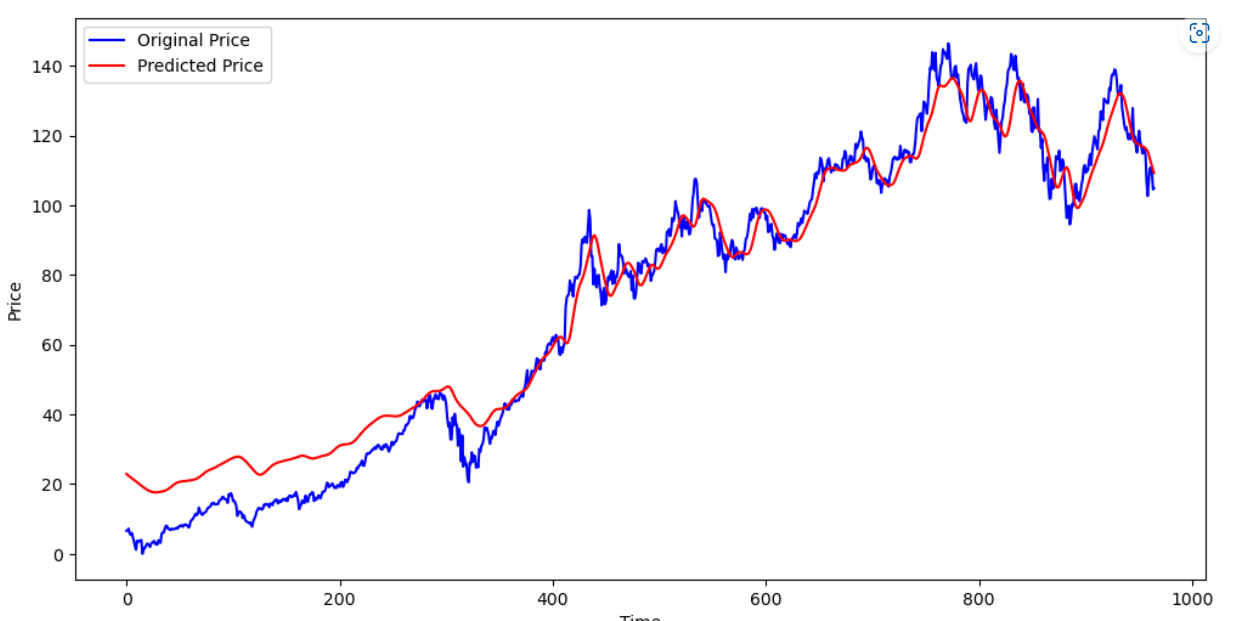